In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

In [116]:
podcastDF = pd.read_csv('DataBases/clean_podcast_genres.csv', delimiter=',')
podcastDF.head()
podcastDF['rank_date'] = pd.to_datetime(podcastDF['rank_date'])

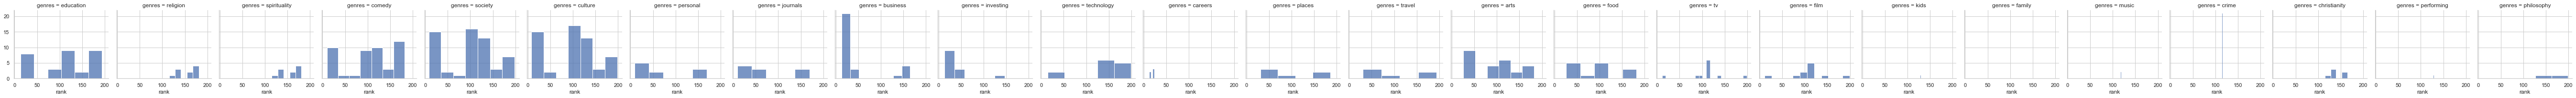

In [117]:
g = sns.FacetGrid(podcastDF, col="genres")
g.map(sns.histplot, "rank")


<AxesSubplot:xlabel='rank_date', ylabel='rank'>

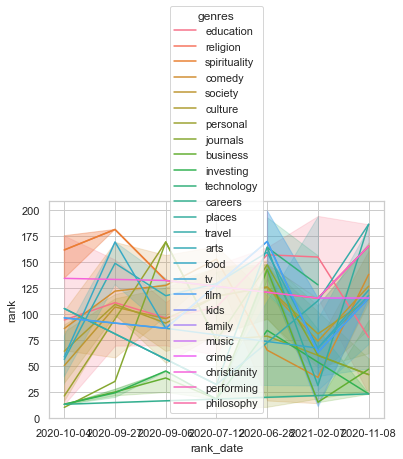

In [19]:
sns.lineplot(x="rank_date", y ='rank', hue="genres", data=podcastDF)

In [118]:
#reduce the number of genres to analize the ones that were consistently highly rated
lowRank=['religion','places', 'christianity', 'travel', 'careers', 'philosophy', 'music', 'performing', 'kids' , 'family']
podcastDFhighRank = podcastDF[~podcastDF['genres'].isin(lowRank)]
podcastDFhighRank.head()

,creator,name,rank,rank_date,genres
0,NaN,almost 30,175,2020-10-04,education
2,NaN,almost 30,175,2020-10-04,spirituality
4,NaN,almost 30,175,2020-10-04,spirituality
5,NaN,almost 30,175,2020-10-04,education
6,NaN,almost 30,181,2020-09-27,spirituality


<AxesSubplot:xlabel='rank_date', ylabel='rank'>

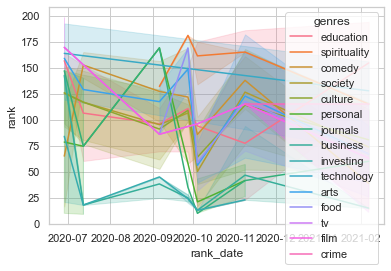

In [119]:
sns.lineplot(x="rank_date", y ='rank', hue="genres", data=podcastDFhighRank)

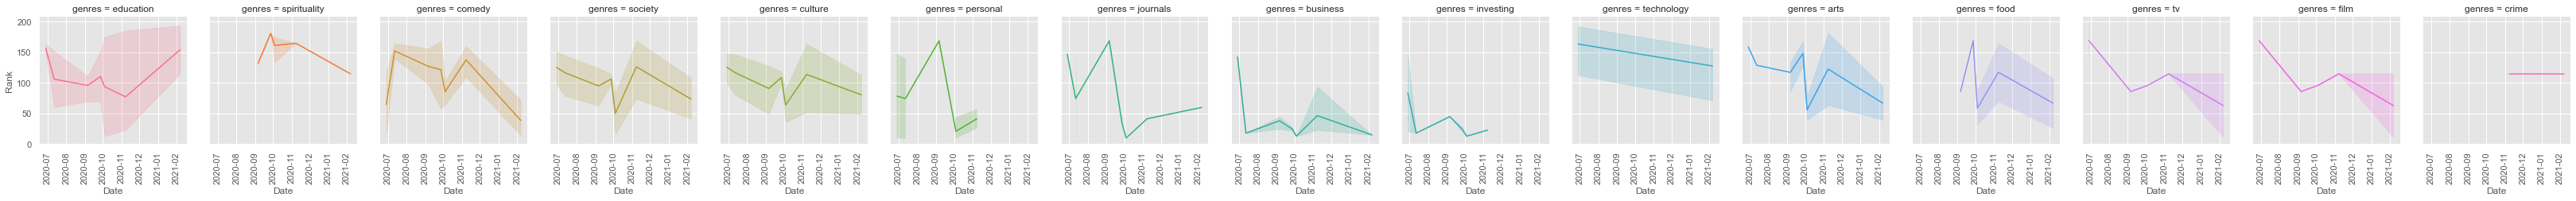

In [122]:
g = sns.FacetGrid(podcastDFhighRank, col="genres", hue="genres")
g.map_dataframe(sns.lineplot, x="rank_date", y="rank")
g.set_axis_labels("Date", "Rank")
g.set_xticklabels(rotation=90)


In [121]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

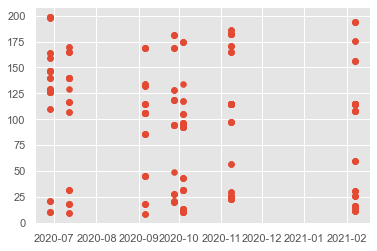

In [123]:
plt.scatter(podcastDFhighRank['rank_date'], podcastDFhighRank['rank'])

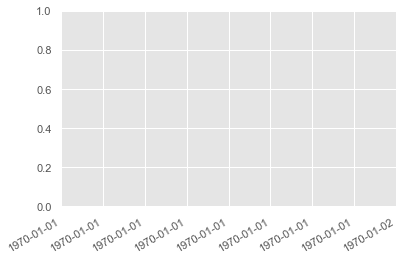

In [124]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#sns.tsplot(podcastDFhighRank, time='rank_date', value ="rank")

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

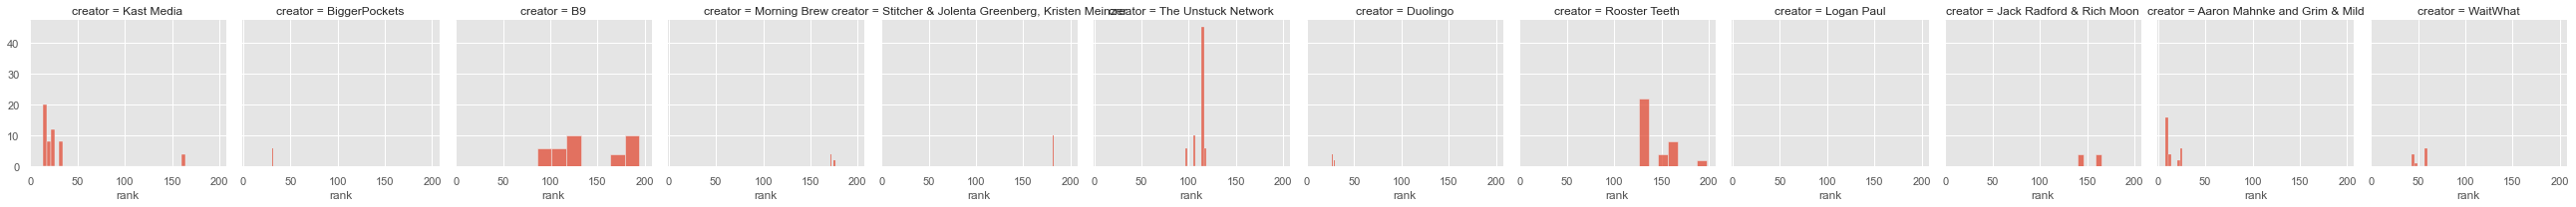

In [125]:
g = sns.FacetGrid(podcastDF , col="creator")
g.map(sns.histplot, "rank")

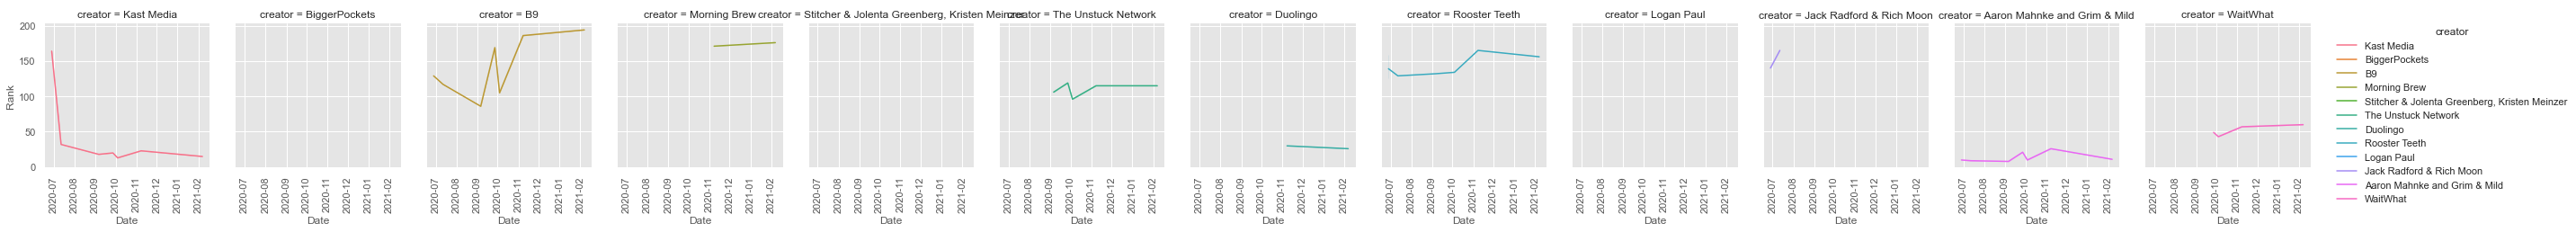

In [127]:
g = sns.FacetGrid(podcastDFhighRank, col="creator", hue="creator")
g.map_dataframe(sns.lineplot, x="rank_date", y="rank")
g.set_axis_labels("Date", "Rank")
g.set_xticklabels(rotation=90)

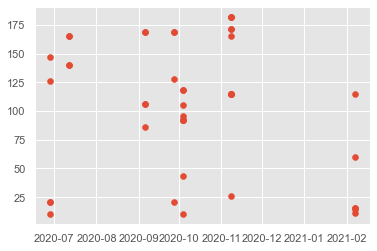

In [129]:
comedy = podcastDF[podcastDF['genres'] == 'comedy']
plt.scatter(comedy['rank_date'], comedy['rank'])

In [175]:
#dataFrame to compare ranks in each genre

podcast_unstack = podcastDFhighRank.drop(['name','creator'], axis=1)#

podcast_unstack['date']= podcast_unstack['rank_date']
podcast_unstack.drop(columns = 'rank_date')
podcast_unstack = podcast_unstack.groupby(['date', 'genres']).agg('mean').round(2) 

#new column per genre with the mean rank as value

podcast_unstack = podcast_unstack.unstack(level=-1)

#fill Na with 0
podcast_unstack.fillna(0, inplace= True)
podcast_unstack

rank                                                          \
genres        arts business  comedy  crime culture education   film   food   
date                                                                         
2020-06-28  159.00   142.50   65.00    0.0  125.82    156.67  169.5    0.0   
2020-07-12  129.00    18.00  152.50    0.0  116.83    106.33    0.0    0.0   
2020-09-06  117.33    38.25  127.20    0.0   91.00     96.00   86.0   86.0   
2020-09-27  148.50    24.80  121.75    0.0  109.00    110.67    0.0  169.0   
2020-10-04   56.12    13.00   85.80    0.0   64.00     94.00   96.0   58.6   
2020-11-08  122.75    46.67  137.83  115.0  114.00     77.33  115.0  117.6   
2021-02-07   67.00    15.00   38.83  115.0   80.67    154.50   63.0   67.0   

                                                                               
genres     investing journals personal society spirituality technology     tv  
date                                                                           
2020-06-28      84.0    147.0     78.5  125.50         0.00     163.75  169.5  
2020-07-12      18.0     74.5     74.5  116.83         0.00       0.00    0.0  
2020-09-06      45.0    169.0    169.0   95.22       132.00       0.00   86.0  
2020-09-27      24.0     35.0      0.0  106.50       181.00       0.00    0.0  
2020-10-04      13.0     10.0     21.0   50.20       161.33       0.00   96.0  
2020-11-08      23.0     41.5     41.5  126.50       165.00       0.00  115.0  
2021-02-07       0.0     60.0      0.0   73.73       115.00     127.80   63.0

/Applications/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


([<matplotlib.axis.YTick at 0x7faa723f6f70>,
 [])

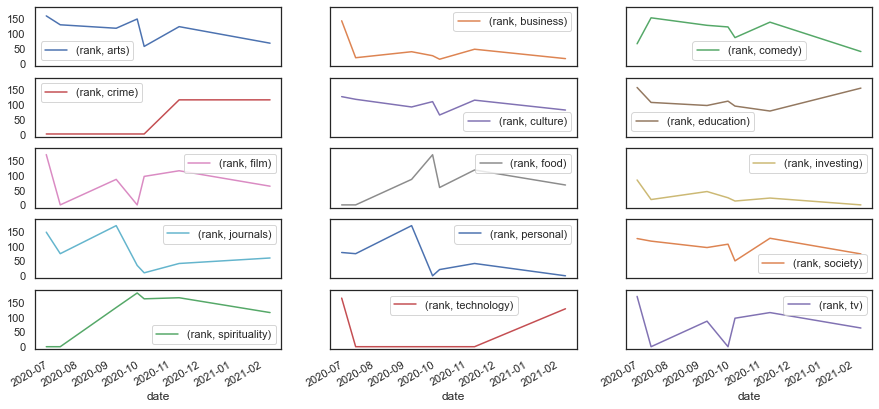

In [182]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))

podcast_unstack.plot(ax=ax, subplots=True, layout=(5, -1), sharex=True, sharey=True)
ax.set_ylim(0,200)
plt.yticks(np.arange(0, 200, 50))

In [157]:
#find correlation among genres

podcast_corr = podcast_unstack.corr()

<AxesSubplot:xlabel='None-genres', ylabel='None-genres'>

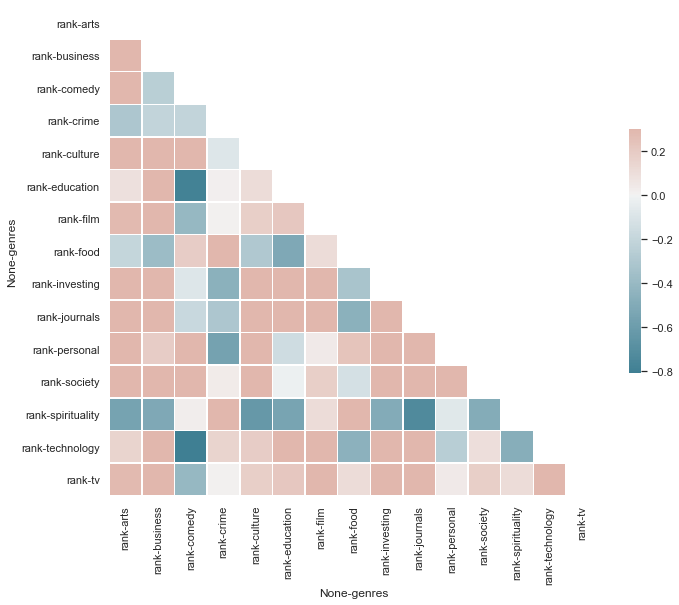

In [161]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(podcast_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(podcast_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})